![](http://www.forkscorksandkegs.com/wp-content/uploads/2012/06/Banner-Vineyard-927x282.png)
# Wine Quality Predictor

## 1. Introduction

**1.1) Problem Statement**

Predict the quality of wine based on chemical properties.

**1.2) Use Cases**

The machine learn algorithm can help wineries during the maturity process of the wine to balance certain chemicals in order to improve the wine quality. 

**1.3) Exclusions** 

There are other features important to consider when producing wine that are not contemplated on this study such season weather, soil conditions, harvest date, aging, grape type, etc. 

**1.4) Original Idea**

The original idea for this project came from the [Analytics Vidhya blog](https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/) post containing ideas for Machine Learning Projects.

## 2. The Dataset

The data set containing the chemical properties (measured by lab) and the respective overall quality (assessed by wine experts) for respectively 1599 red wines.

The data sets contain the following information:

|Property|Description|
|--:|:--|
|Fixed Acidity |Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).|
|Volatile Acidity|The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
|Citric Acidity|Found in small quantities, citric acid can add 'freshness' and flavor to wines.
|Residual Sugar|Amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
|Chlorides|The Amount of salt in the wine.
|Free Sulfur Dioxide|The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
|Total Sulfur Dioxide|Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
|Density|The density of water is close to that of water depending on the percent alcohol and sugar content.
|pH|How acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
|Sulphates|A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.
|Alcohol|The percent alcohol content of the wine.
|Quality|The overall quality of the wine classified by a wine expert.

Data set link: [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)


## 3. Exploratory Data Analysis (EDA)

### Introduction

Since both red and white wines can potentially have different properties, we'll be splitting the analysis into two dinstinct datasets. At the end, we'll be drawing conclusions on how we approach the Red/White wines quality analysis distinctively.

In [449]:
# import necessary libs for EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


### Load Dataset

In [452]:
# Load dataset
wine = pd.read_csv('./datasets/winequality-red.csv')

In [453]:
# With info() we'll quickly check a summary of:
# 1. Data volume (number rows)
# 2. The data types (check if there's any need of data type conversion)
# 3. The atributes or columns in the data frame
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [454]:
# Check for duplicates - On this case it seems to be duplicates (trimmed below) but these are different Wines
# with exact same attributes.
wine[wine.duplicated(keep=False)].head(6)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
27,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5


In [638]:
# We will drop the "duplicates" because for our study it's not relevant to have multiple samples of wines
# with the exactly same attributes.
wine = wine.drop_duplicates(subset=None, keep="first", inplace=False)

In [639]:
# Check new record size
wine.shape

(1359, 12)

In [457]:
# Summary of the attributes to get an idea how the attributes value ranges and averages
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observation**

An important observation are the quality attributes. The wines rate from 0-10, which zero is the worst and 10 the best.

* Highest: 8 
* Mean: 5.63
* Lowest: 3

I have defined the following qualitiative criteria:


|Rating |Description     |
|------:|:---------------|
|1      | Demolish       |
|2      | Horrible       |
|3      | Terrible       |
|4      | Bad            |
|5      | OK             |
|6      | Good           |
|7      | Very Good      |
|8      | Great          |
|9      | Excellent      |
|10     | Perfect        |

This being said, since the **average red wine quality is 5.63** we can say the great majority of the samples the wine are "OK".

In [399]:
# Let's check if there's any null value - None on this case
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

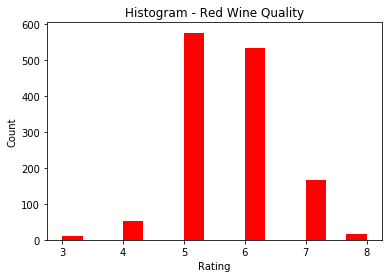

In [400]:
# Visualize the quality of the Red Wines in the dataset
num_bins = 15
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram - Red Wine Quality')
plt.hist(wine['quality'], bins=num_bins, facecolor='red')
plt.show()

### important Note!

As you can see below, the dataset is severely **unbalanced**. Unbalanced datasets tend to produce unsatisfactory predictions.


In [458]:
# Count per Rate (table view)
wine.groupby(['quality'])['quality'].count()

quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

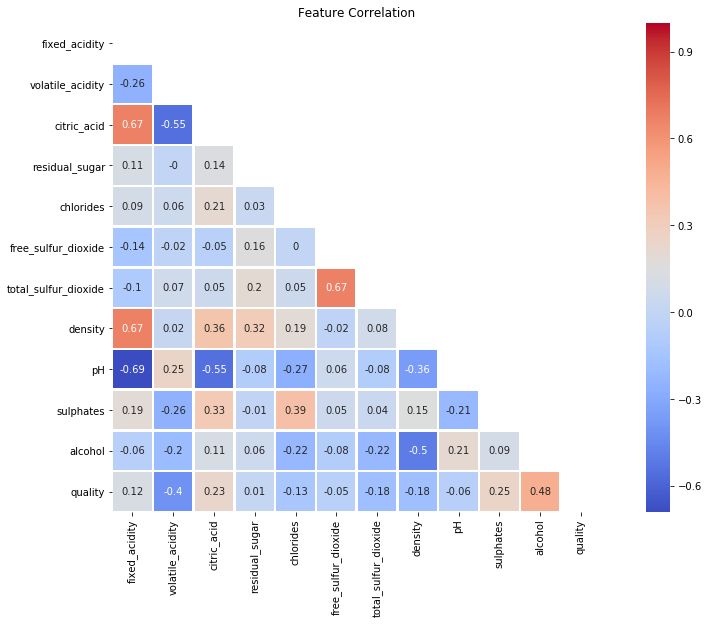

In [402]:
# Next, we'll produce a correlation heatmap. We expect to observe which red wine features
# are strongly correlated with the Quality.
bogus_col = ['A','B','C','D','E','F','G','H', 'I', 'J', 'K', 'L']
bogus_data = np.random.randn(12,12)
bogus_df = pd.DataFrame(bogus_data, columns=bogus_col)
mask = np.triu(np.ones(bogus_df.shape)).astype(np.bool)
plt.subplots(figsize=(16,9))
plt.title('Feature Correlation')
sns.heatmap(data=wine.corr().round(2), mask=mask, cmap='coolwarm', annot=True, square=True, linewidths=1.5)
plt.show()


### Observations

We can observe that strongest feature correlations with the "Quality" are:

1. Alcohol (+0.48)
2. Volatile Acidity (-0.40)
3. Sulphates (+0.25)
4. Citric Acid (+0.23)
5. Total Sulfur Dioxide (-0.18)

Other features such as "Free Sulfur Dioxide" and "Residual Sugars" have nearly zero correlation.

It's also observable than the "acidity" features are strongly correlated with the "pH" - which by knowing elementary chemistry makes all the sense. However this is not our focus.

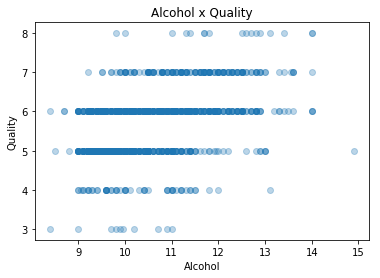

In [403]:
# visualising the relationship between the Alcohol level and Quality
plt.title("Alcohol x Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.scatter(wine['alcohol'], wine['quality'], alpha=0.3)
plt.show()

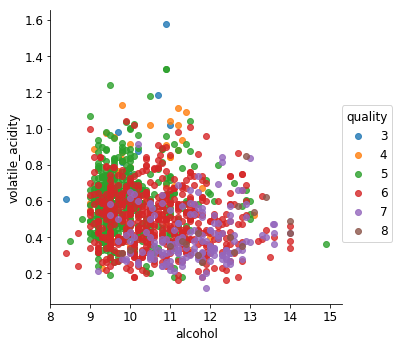

In [404]:
# Visualising the two featurs with strongest correlation with quality
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12
sns.lmplot(x="alcohol", y="volatile_acidity", data=wine, hue="quality", fit_reg=False, legend=True)
plt.show()

### Conclusions (EDA)

A possible **shortcoming** is that in dataset seems **imbalanced**, both datasets lack samples of extremely low/high rating such as (1,2) and (9,10) therefore our model might not be accurately predict these quality ranges as we have no means to validate its accuracy since there are no samples with these ratings in the dataset. It is expected that as more data gets into to the data, the accuracy model improves by learning from new additions.

# 4. Feature Selection

### What is Feature Selection?

Feature selection is the process of finding and selecting the most relevant features to be used to solve our problem. Too little or too may features can impact the quality of the solution, therefore it's important to find a **good balance** of the features.

### Selection Criterias

When selecting features it's importanto to consider the following:

* Highly consider features (X) with high correlation to our target (y)
* Avoid colinear features - Meaning features (X) that have a strong correlation between each other.
* Avoid features with zero importance - Meaning, with very low or nearly zero correlation to our target feature (y)
* Avoid features with high-number of missing values (not our case)

### Method 1: Observing Correlations (Manual Selection)

This method consists of observing the correlation between the features and select the features that seem to strongly correlate with our target feature. This method can work quite well on simple or low-complexity models. However it does open a door for introducing "bias" into our model as we might miss important pieces of information that are not easily observed by eye. 

By observing again our correlation heatmap, we have the following top-5 correlation:

1. Alcohol (+0.48)
2. Volatile Acidity (-0.40)
3. Sulphates (+0.25)
4. Citric Acid (+0.23)
5. Total Sulfur Dioxide (-0.18)

However if we do observe a little further we can also find-out that there are **colinear features** between these, such as:
* volatile_acidity / citric_acidity (-0.55)

Thefore maintaining simultaneously these two variables is not good as it affectives negatively our predictors. It is suggested to drop one of them, so in these case we would de-select the "citric Acid" as it's the weaknest from the list that correlates to our quality (y) parameter.

**Manually Selected Features:**
1. Alcohol (+0.48)
2. Volatile Acidity (-0.40)
3. Sulphates (+0.25)
4. Total Sulfur Dioxide (-0.18)


### Method 2: Feature Importance (Automatic Selection)

This method makes use of the Scikit-Learn automated feature selection based on **Feature Importance**. We allow the scikit algorithm to make the decision of which features to use on our behalf. This method relies on making use of **decision trees** like Random Forrest to estimate the importance of our features.

Reference: [Scikit Feature Selection](https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/)



In [411]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# load dataset
X = wine.drop(['quality'], axis=1)
y = wine['quality']

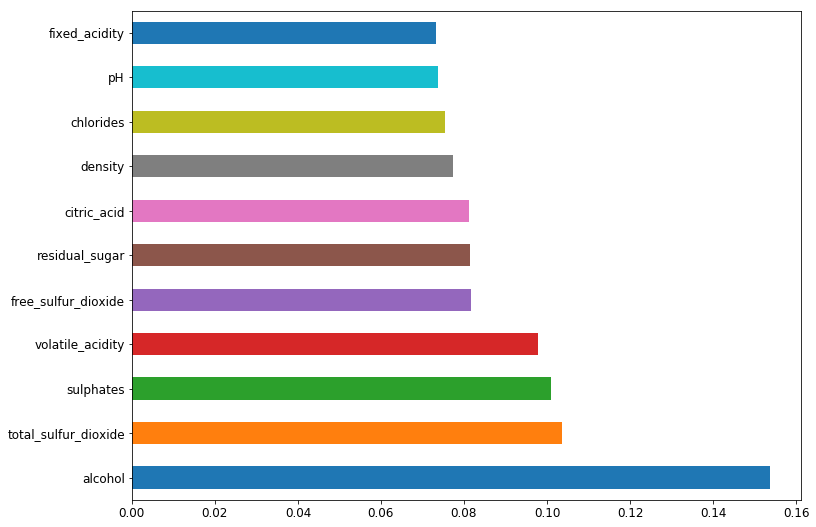

In [412]:
# fit an Extra Trees model to the data
model_fi = ExtraTreesClassifier()
model_fi.fit(X, y)

feat_importances = pd.Series(model_fi.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(15)
feat_importances.plot(kind='barh')

As it can be visualised in the bar chart above, the  

To summarise, please find our feature selection rank per method:


| Feature             | Manual | Feat. Importance |
|--------------------:|:------ |:----------------:|
|Fixed Acidity        | N/A    | 8                |
|Volatile Acidity     | 2      | 5                |
|Citric Acidity       | N/A    | 6                |
|Residual Sugar       | N/A    | 7                |
|Chlorides            | N/A    | 9                |
|Free Sulfur Dioxide  | N/A    | 10               |
|Total Sulfur Dioxide | 4      | 2                |
|Density              | N/A    | 4                |
|pH                   | N/A    | 11               |
|Sulphates            | 3      | 3                |
|Alcohol              | 1      | 1                |






**Summary** 

The selections differs per method. Further down, we'll be testing the 3 methods and see which produces the best result.

# 5. Model Selection  

Since our target (y) value is a 10-point rating scale, we will treat this problem as a **classification problem**. However, Linear Regression would also work for what we are trying to achieve.

Below we are going to test a few different models to know which one can workout better. We're going to start simple and then try more complex variations. 

### Model Resampling

As the model is imbalanced, we are going going to apply some techniques to balance the dataset, namely:

* Tomek: By undersampling the majority classes
* SMOTE: By oversamling the minority classes
* SMOTE+Tomek: Combination of both above

In [424]:
from sklearn.model_selection import train_test_split

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [425]:
from sklearn import metrics 
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import classification_report

# Function for Model Resample with Tomek (Undersampling)
def model_resample(X_train, X_test, y_train, y_test, model):
    # TOMEK Links
    sample = TomekLinks()
    X_resampled, y_resampled = sample.fit_sample(X_train, y_train)
    model.fit(X_resampled, y_resampled)    
    predictions = model.predict(X_test)
    
    print(classification_report(y_test, predictions))
    print("Kappa Coef:", metrics.cohen_kappa_score(y_test, predictions, labels=None, weights=None, sample_weight=None))
    
    return True

In [426]:
# New resampled DataFrame
df_X = pd.DataFrame(X_resampled)
df_y = pd.DataFrame(y_resampled)
red_resampled = pd.concat([df_X, df_y], axis=1)

red_resampled.columns = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 
                 "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density",
                 "pH", "sulphates", "alcohol", "quality"]

print("Resampled DataFrame:", red_resampled.shape)
print("X_resampled:", X_resampled.shape)
print("y_resampled:", y_resampled.shape)

Resampled DataFrame: (653, 12)
X_resampled: (653, 11)
y_resampled: (653,)


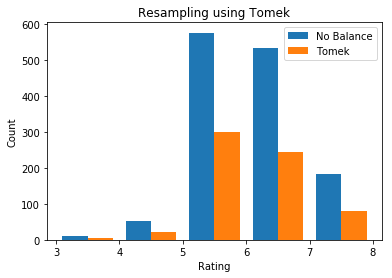

In [538]:
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Resampling using Tomek')
plt.hist([red['quality'], red_resampled['quality']], 5, label=['No Balance', 'Tomek'])
plt.legend(loc='upper right')
plt.show()

### Logistic Regression

In [488]:
# supress warnings due classes with zero score
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
results = model_resample(X_train, X_test, y_train, y_test, model)



             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        12
          5       0.64      0.80      0.71       148
          6       0.52      0.60      0.56       132
          7       0.00      0.00      0.00        41
          8       0.00      0.00      0.00         3

avg / total       0.48      0.58      0.53       340

Kappa Coef: 0.2906467632452764


### Random Forrest Classifier

In [489]:
# supress warnings due classes with zero score
import warnings
warnings.filterwarnings('ignore')

model = RandomForestClassifier(bootstrap=False, criterion="gini", 
                               max_features=0.4, min_samples_leaf=7, 
                               min_samples_split=14, n_estimators=100)

results = model_resample(X_train, X_test, y_train, y_test, model)


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        12
          5       0.69      0.74      0.71       148
          6       0.55      0.67      0.61       132
          7       0.65      0.32      0.43        41
          8       0.00      0.00      0.00         3

avg / total       0.59      0.62      0.60       340

Kappa Coef: 0.3733927653008744


### K-Nearest Neighbors (KNN)

In [515]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

# supress warnings due classes with zero score
import warnings
warnings.filterwarnings('ignore')

# set k-value range (1 to 50)
k_range = list(range(1, 51))

# scores list
scores = []
scores_kappa = []
scores_f1 = []
scores_recall = []
scores_precision = []
scores_cv = []

# Compute all k-values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores_cv.append(cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy').mean())
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    scores_f1.append(metrics.f1_score(y_test, y_pred, average='weighted'))
    scores_kappa.append(metrics.cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None))
    scores_recall.append(metrics.recall_score(y_test, y_pred, average='weighted'))
    scores_precision.append(metrics.precision_score(y_test, y_pred, average='weighted'))
    
# Optimal k-value
k_optimal = scores.index(max(scores)) + 1

# Optimal F1
f1_optimal = scores_f1.index(max(scores_f1)) + 1

# Optimal Kappa
kappa_optimal = scores_kappa.index(max(scores_kappa)) + 1

# Optimal Recall
recall_optimal = scores_recall.index(max(scores_recall)) + 1

# Optimal Precision
precision_optimal = scores_precision.index(max(scores_precision)) + 1

# Optimal CV
cv_optimal = scores_cv.index(max(scores_cv)) + 1

# Print values
print("The Best K-values:\n")
print("k-value:", k_optimal, "Accuracy:", round(max(scores), 5))
print("k-value:", precision_optimal, "Precision:", round(max(scores_precision), 5))
print("k-value:", recall_optimal, "Recall:", round(max(scores_recall), 5))
print("k-value:", f1_optimal, "F1:", round(max(scores_f1), 5))
print("k-value:", kappa_optimal, "Kappa:", round(max(scores_kappa), 5))
print("CV:", round(max(scores_cv),5))

The Best K-values:

k-value: 22 Accuracy: 0.53235
k-value: 22 Precision: 0.50564
k-value: 22 Recall: 0.53235
k-value: 22 F1: 0.49897
k-value: 22 Kappa: 0.2141
CV: 0.52641


Text(0,0.5,'Testing Accuracy')

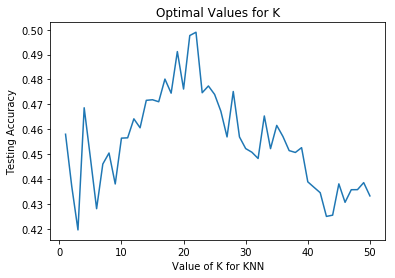

In [524]:
# Plot the k-values for better visualisation
plt.title('Optimal Values for K')
plt.plot(k_range, scores_f1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [525]:
model = KNeighborsClassifier(n_neighbors=22)
results = model_resample(X_train, X_test, y_train, y_test, model)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        12
          5       0.54      0.65      0.59       148
          6       0.44      0.52      0.47       132
          7       0.14      0.02      0.04        41
          8       0.00      0.00      0.00         3

avg / total       0.42      0.49      0.45       340

Kappa Coef: 0.13170375775264498


### Comments

The Logistic Regression out of the box model gives a **score of 57%**. This not good at all as I am aiming for a baseline of 95%. However more worrying than that is our **recall** especially for the minority classes. Values need to be improved.

**Definitions Recap**: 
* Precision: Ratio of correctly predicted observation to the total observations.
* Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class
* F1 Score: Weighted average of Precision and Recall


### Automatic Selection Using TPOT

In [527]:
from tpot import TPOTClassifier
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# SMOTE (Over Sampling Method)
model_smote = SMOTE(random_state=0)
X_smote, y_smote = model_smote.fit_sample(X, y)

print(X_smote.shape)
print(y_smote.shape)


(3462, 11)
(3462,)


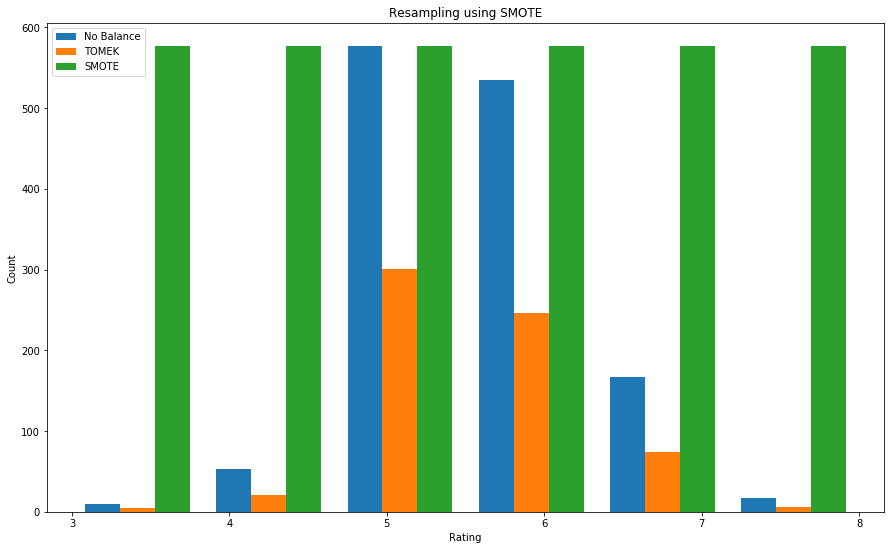

In [579]:
df_X = pd.DataFrame(X_smote)
df_y = pd.DataFrame(y_smote)
red_smote = pd.concat([df_X, df_y], axis=1)


red_smote.columns = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide",
                                              "total_sulfur_dioxide",
                                              "density",
                                              "pH",
                                              "sulphates",
                                              "alcohol",
                                              "quality"]

# Plot Graphs
plt.xlabel('Rating')
plt.ylabel('Count')
plt.rcParams["figure.figsize"] = (16,9)
plt.title('Resampling using SMOTE')
plt.hist([red['quality'], red_resampled['quality'], red_smote['quality']], bins=6,
         label=['No Balance', 'TOMEK', 'SMOTE'])
plt.legend(loc='upper left')
plt.show()

In [640]:
# Double Check class balance
red_smote.groupby(['quality'])['quality'].count()

quality
3    577
4    577
5    577
6    577
7    577
8    577
Name: quality, dtype: int64

In [287]:
# T-Pot Classifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)

# Train Model
tpot.fit(X_smote, y_smote)

# Print Score
print("Model: Score:", round(tpot.score(X_test, y_test), 3))

# Output the model settings
tpot.export('tpot_smote.py')

Generation 1 - Current best internal CV score: 0.7859570214892553


Generation 2 - Current best internal CV score: 0.7859570214892553


Generation 3 - Current best internal CV score: 0.7932083958020989


Generation 4 - Current best internal CV score: 0.7932083958020989


Generation 5 - Current best internal CV score: 0.7955322338830585



Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.2, min_samples_leaf=3, min_samples_split=13, n_estimators=100)
Model: Score: 0.968


True

### Random Forrest Classifier

In [590]:
# supress warnings due classes with zero score
import warnings
warnings.filterwarnings('ignore')

model = RandomForestClassifier(bootstrap=False, 
                               criterion="gini", 
                               max_features=0.2, 
                               min_samples_leaf=3, 
                               min_samples_split=13, 
                               n_estimators=100)
# Train Model
model.fit(X_test, y_test)

# Make Predictions    
predictions = model.predict(X_test)
    
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          3       1.00      0.25      0.40         4
          4       1.00      0.25      0.40        12
          5       0.91      0.98      0.94       148
          6       0.94      0.98      0.96       132
          7       0.95      0.85      0.90        41
          8       0.00      0.00      0.00         3

avg / total       0.92      0.92      0.91       340



In [587]:
# Checking the Cohen Kappa Coefficient
metrics.cohen_kappa_score(y_test, predictions, labels=None, weights=None, sample_weight=None)

0.8870713277422569

In [588]:
# supress warnings due classes with zero score
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression
model = LogisticRegression()

# Train Model
model.fit(X_test, y_test)

# Make Predictions    
predictions = model.predict(X_test)
    
print(classification_report(y_test, predictions))

# Checking the Cohen Kappa Coefficient
metrics.cohen_kappa_score(y_test, predictions, labels=None, weights=None, sample_weight=None)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        12
          5       0.66      0.79      0.72       148
          6       0.54      0.61      0.57       132
          7       0.40      0.15      0.21        41
          8       0.00      0.00      0.00         3

avg / total       0.55      0.60      0.56       340



0.3273937591151286

### Confusion Matrix

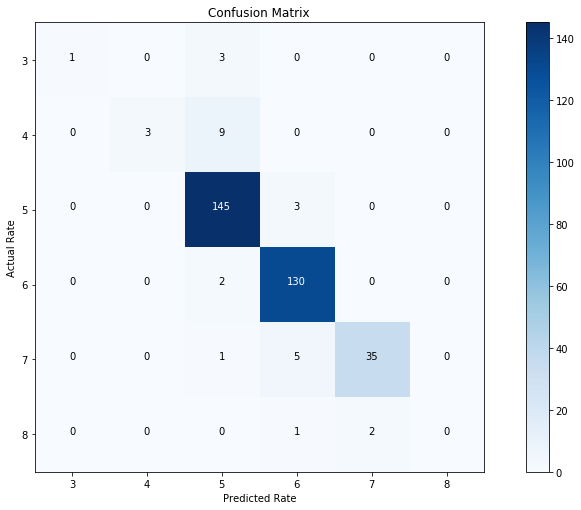

In [591]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = ['3', '4', '5', '6', '7', '8']


def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.figure(figsize=(12,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Rate')
    plt.xlabel('Predicted Rate')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)

plt.show()

# Optimal Wine Properties

The top-3 wine most important chemical properties for wine quality are:

* Alcohol
* Total Sulfur Dioxide
* Sulphates

These properties need to be within certain chemical ranges in order in order to make an higher quality wine.



# Final Thoughts

My biggest challenge was how to deal with imbalanced data. On real life the data sets are not perfect and therefore an imperfect data sets have better learnings. 

At the end, this is not about to get the best result but instead to make the best out of the data made available to us.

Please check the Web-api folder for the API created using Flask and website creation as a continuous effort for this project. 